In [12]:
# Installs this package locally so we can import it like any other module (see below).
!pip install -e ..

Obtaining file:///Users/Apex/Desktop/MIDS/w251/ucb_mids_w251_project
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Attempting uninstall: mids-plane-classification
    Found existing installation: mids-plane-classification 0.0.1
    Uninstalling mids-plane-classification-0.0.1:
      Successfully uninstalled mids-plane-classification-0.0.1
  Running setup.py develop for mids-plane-classification
You should consider upgrading via the '/Users/Apex/Desktop/MIDS/MIDS/bin/python3 -m pip install --upgrade pip' command.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mids_plane_classification.loaders.dataloader import PlaneDataModule

In [3]:
dm = PlaneDataModule(train_batch_size=32, val_batch_size=32, data_dir='../data', seed=2)

# Only needs to be called once!
# Once the data is downloaded, only setup() is needed.
dm.prepare_data()
dm.setup()

In [4]:
# There are 11 unique classes.
annotations = pd.read_csv('../data/MTARSI.csv')
annotations['Band'].unique()

array(['Boeing', 'B-1', 'B-2', 'B-52', 'C-130', 'KC-135', 'C-17', 'C-5',
       'E-3', 'F-22', 'KC-10'], dtype=object)

In [5]:
# Default split is 0.8.
print(f'Dataset: {len(dm.dataset)}\nTrain: {len(dm.train_dataset)}\nTest: {len(dm.val_dataset)}')

Dataset: 6405
Train: 5124
Test: 1281


In [6]:
# View the class mapping inferred by ImageFolder.
print(dm.dataset.class_to_idx)

{'B-1': 0, 'B-2': 1, 'B-52': 2, 'Boeing': 3, 'C-130': 4, 'C-17': 5, 'C-5': 6, 'E-3': 7, 'F-22': 8, 'KC-10': 9, 'KC-135': 10}


In [7]:
from collections import Counter

print(Counter(dm.dataset.targets))

Counter({8: 846, 4: 763, 1: 619, 3: 605, 9: 554, 2: 548, 10: 526, 0: 513, 6: 499, 5: 480, 7: 452})


In [8]:
# Access the data loaders directly from the modules.
train_loader = dm.train_dataloader()
val_loader = dm.val_dataloader()

(3, 256, 256)


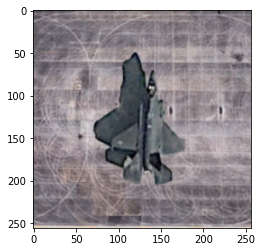

In [9]:
img_idx = 0

# Verifying dataloader is applying transform.
print(dm.train_dataset[img_idx][0].numpy().shape)

# View the image.
image = np.transpose(dm.train_dataset[img_idx][0].numpy(), (1, 2, 0))
plt.imshow(image)

In [10]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Can also override with your own transform:
train_transform = A.Compose([
    A.RandomResizedCrop(height=256, width=256, scale=(0.7, 0.9)),
    A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    ToTensorV2(),
])

val_transform = A.Compose([
    A.Resize(width=256, height=256),
    ToTensorV2(),
])

dm = PlaneDataModule(
    train_batch_size=32,
    val_batch_size=32,
    data_dir='../data',
    train_transform=train_transform,
    val_transform=val_transform,
    seed=2
)
dm.setup()

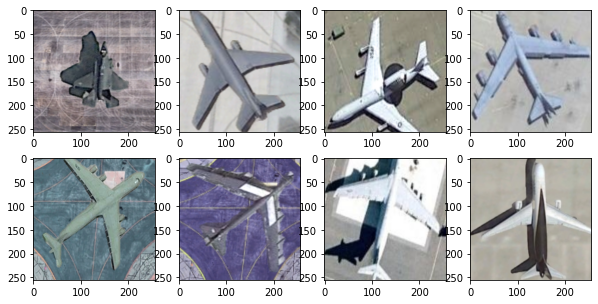

In [11]:
img_idx = 8

# View the image.
images = [
    np.transpose(dm.train_dataset[idx][0].numpy(), (1, 2, 0))
    for idx in range(img_idx)
]

fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_figheight(5)
fig.set_figwidth(10)
axes = axes.flatten()

for ax, image in zip(axes, images):
    ax.imshow(image)